Q1: Some physical properties of Cu-Sn alloys at 300 K are listed in the file
http://www.acsu.buffalo.edu/~erikeina/MDI505/Cu-Sn-alloy-properties.csv
X is the atomic fraction of Sn, rho is resistivity, sigma is electrical conductivity, kappa is thermal conductivity, cs is specific heat capacity, lambda is linear expansion coefficient, Y is Young's modulus, and d is density. Units are given in parentheses. Assume the Cu-Sn is a solid solution over this composition range.
(a) Using these data and Matthiessen's rule, determine the temperature coefficient of resistivity (TCR) for these Cu-Sn alloys.
(b) Based on your regression for part (a), what is the resistivity of pure copper? What should be the resistivity of an alloy containing 3 atomic % Sn (X=0.03)?
(c) The Wiedemann-Franz law says thermal conductivity and electrical conductivity are related by kappa/sigma = CWFT. Plot this relation and determine the constant CWF in units of W Ω K-2.

The temperature coefficient of resistivity is  2671.860738814258


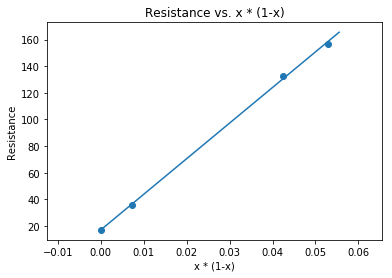

In [10]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1-(a)
data = pd.read_csv('Cu-Sn-alloy-properties.csv', header=0, index_col=None)

x = data.iloc[:,2].values
Rho = data.iloc[:,3].values

x1 = x * (1-x)

b = np.ones(len(x1))
x2 = np.vstack([x1, b]).T
theta = np.linalg.lstsq(x2, Rho, rcond=None)[0]

x3 = np.arange(0, 0.06, 0.001)
x3 = x3 * (1-x3)
y3 = theta[0] * x3 + theta[1]
print('The temperature coefficient of resistivity is ', theta[0])

plt.scatter(x1, Rho)
plt.xlabel('x * (1-x)')
plt.ylabel('Resistance')
plt.title('Resistance vs. x * (1-x)')
plt.plot(x3, y3)
plt.show()

In [11]:
# Q1-(b)

X1 = 0
X2 = 0.03
C = theta[0]
Rho_Pure_Cu = C * X1 * (1-X1) + theta[1]
Rho_Cu_Sn_alloy = C * X2 * (1-X2) + theta[1]
print('The resistivity of pure copper is:', Rho_Pure_Cu)
print('The resistivity of  an alloy containing 3 atomic % Sn is:', Rho_Cu_Sn_alloy)

The resistivity of pure copper is: 17.16438547731259
The resistivity of  an alloy containing 3 atomic % Sn is: 94.9155329768075


The constant Cwf is: 2.1757836064295395e-08


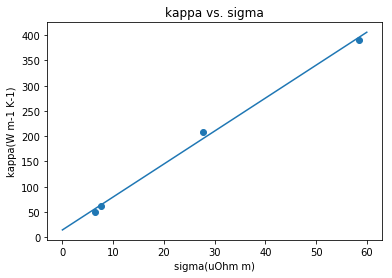

In [13]:
# Q1-(c)

sigma = data.iloc[:,4].values
kappa = data.iloc[:,5].values
b = np.ones(len(sigma))
x = np.vstack([sigma, b]).T
theta = np.linalg.lstsq(x, kappa, rcond=None)[0]
Cwf = theta[0] / 300 * 0.000001
print('The constant Cwf is:', Cwf)

sigma1 = np.linspace(0, 60, 100)
kappa1 = theta[0] * sigma1 + theta[1]

plt.scatter(sigma, kappa)
plt.xlabel('sigma(uOhm m)')
plt.ylabel('kappa(W m-1 K-1)')
plt.title('kappa vs. sigma')
plt.plot(sigma1, kappa1)
plt.show()

Q2. From MD calculations such as discussed in class, we have calculated the following data of thermal and electrical resistivity as a function of chemistry:
http://www.acsu.buffalo.edu/~erikeina/MDI505/mdi505-exam1-question-2.csv
The calculations were performed using Lennard-Jones calculation of energy, periodic boundary conditions, 16 cells, the Verlet approach for velocity, temperature set to 300K and cut-off equal to 2.5σ.
(a) Using only the data from the MD calculation, recalculate the constant CWF? Does this agree with the result of problem 1? If no then what are the likely causes for differences, and if yes then explain why MD is sufficient?
(b) What relationships do you identify between the chemistry and the trend with conductivity, ie. what about chemistry shows noticeable impact on model results?
(c) Using the data for Cu and Sn, predict the thermal and electrical conductivities of the compositions from problem 1. What are possible explanations for any deviations from the experimental data, and if there are no deviations then why is MD able to correctly model the property values?

The recalculation of Cwf is: 6.578995181891072e-09


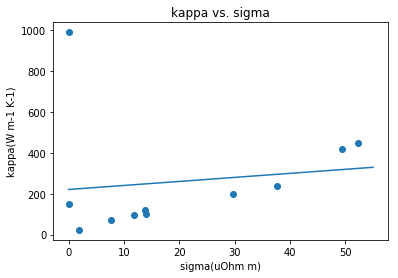

In [18]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q2-(a)
data = pd.read_csv('mdi505-exam1-question-2.csv', header=0, index_col=0)
sigma = data.iloc[0:11,0].values
kappa = data.iloc[0:11,1].values

b = np.ones(len(sigma))
x = np.vstack([sigma, b]).T

theta = np.linalg.lstsq(x, kappa, rcond=None)[0]
Cwf = theta[0] / 300 * 0.000001
print('The recalculation of Cwf is:', Cwf)

sigma1 = np.linspace(0, 55, 500)
kappa1 = theta[0] * sigma1 + theta[1]

plt.scatter(sigma, kappa)
plt.xlabel('sigma(uOhm m)')
plt.ylabel('kappa(W m-1 K-1)')
plt.title('kappa vs. sigma')
plt.plot(sigma1, kappa1)
plt.show()

We can see that the fitted line is not very good. From the raw data, C and Si are nonmetals, thus they should be deleted to fit the line.

[ 8.03850097 -3.82371191]
The recalculation of Cwf (after deleting nonmetal data) is: 2.6795003245908296e-08


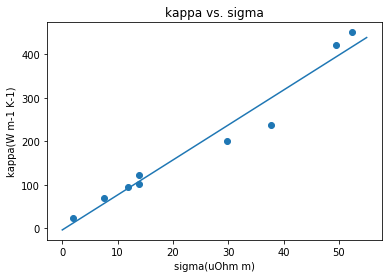

In [17]:
# delete data of nonmetal
sigma = data.iloc[[0,2, 3,4,5,6,7,8,9],0].values
kappa = data.iloc[[0,2, 3,4,5,6,7,8,9],1].values

b = np.ones(len(sigma))
x = np.vstack([sigma, b]).T

theta = np.linalg.lstsq(x, kappa, rcond=None)[0]
print(theta)
Cwf = theta[0] / 300 * 0.000001
print('The recalculation of Cwf (after deleting nonmetal data) is:', Cwf)

sigma1 = np.linspace(0, 55, 500)
kappa1 = theta[0] * sigma1 + theta[1]

plt.scatter(sigma, kappa)
plt.xlabel('sigma(uOhm m)')
plt.ylabel('kappa(W m-1 K-1)')
plt.title('kappa vs. sigma')
plt.plot(sigma1, kappa1)
plt.show()

After deleting the nonmetal C and Si, the fitted line is good, and the Cwf is 2.6795003245908296e-08, the Cwf is almost equal to the result in problem 1, but some deviation is still exsited, the difference is from the same cut-off (2.5σ) for all of the elements.

#Q2-(b): the relationship is: nonmetals shows much lower electrical conductivity (sigma) than metals, but no obvious law can be obtained for kappa.

In [19]:
# Q2-(c)
sigma = data.iloc[[6,9],0].values
kappa = data.iloc[[6,9],1].values

b = np.ones(len(sigma))
x = np.vstack([sigma, b]).T

theta = np.linalg.lstsq(x, kappa, rcond=None)[0]

# for Cu-Sn alloy in problem 1

data = pd.read_csv('Cu-Sn-alloy-properties.csv', header=0, index_col=None)
sigma1 = data.iloc[:,4].values
kappa1 = data.iloc[:,5].values
kappa_predict = theta[0] * sigma1 + theta[1]
delta_kappa = (kappa_predict - kappa1) / kappa1
print('The deviations between prediction and experiment data in problem 1 is ', delta_kappa)

The deviations between prediction and experiment data in problem 1 is  [0.27018917 0.14951834 0.11541466 0.19028247]


From the calcucated result, we can see that the deviation between prediction and experiment data in problem 1 is about 10%~30%. The reason may be ascribed to the small amount of data provided (only two pair of data).

Q3. We will consider the Cu-Ar system. The Lennard-Jones parameters for Ar are σ = 0.341 nm and ε = 119.8 K, and for Cu σ = 0.227 nm and ε = 6765.4 K.
(a) Using the code developed in homework 3, estimate the lattice parameter and energy for an Ar- Cu system in the fcc-like and the bcc-like structure for 25% 50% of Ar (assume solid solution and 0 K conditions).
(b) What modifications would be necessary in order to perform these calculations at non-zero temperatures.

In [23]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

kb = 8.617e-5
e_Cu = 119.8 * kb
e_Ar = 6765.4 * kb
e_CuAr = np.sqrt(e_Cu * e_Ar)
sigma_Cu = 3.41
sigma_Ar = 2.27
sigma_CuAr = np.sqrt(sigma_Cu * sigma_Ar)

In [24]:
# FCC model
def fcc_ucell(a, nc, e_Cu, e_Ar, e_CuAr, sigma_Cu, sigma_Ar, sigma_CuAr):
    n = 4
    r = np.array([[0, 0, 0], [0.5, 0.5, 0], [0, 0.5, 0.5], [0.5, 0, 0.5]])
    ucell = 0
    for k in range(-nc, nc+1):
        for l in range(-nc, nc+1):
            for m in range(-nc, nc+1):
                for i in range(n):
                    for j in range(n):
                        dist = a * np.sqrt((k+r[j,0]-r[i,0]) ** 2 + (l+r[j,1]-r[i,1]) ** 2 + (m+r[j,2]-r[i,2]) ** 2)

                        if dist > 0:
                            if i != 3 and j != 3:
                                u = 2 * 4 * e_Cu * ((sigma_Cu / dist) ** 12 - (sigma_Cu / dist) ** 6)

                            elif i == 3 and j == 3:
                                u = 2 * 4 * e_Ar * ((sigma_Ar / dist) ** 12 - (sigma_Ar / dist) ** 6)

                            else:
                                u = 2 * 4 * e_CuAr * ((sigma_CuAr / dist) ** 12 - (sigma_CuAr / dist) ** 6)

                        else:
                            u = 0

                        ucell = ucell + u

    ucell = ucell/n
    return ucell

the equilibrium energy for fcc is  -1.1490471486130382
the equilibrium distance for fcc is  4.6909090909090905


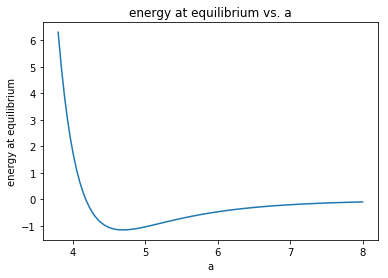

In [25]:
a = np.linspace(3.8, 8, 100)
u = []

for j in a:
    u.append(fcc_ucell(j, 8, e_Cu, e_Ar, e_CuAr, sigma_Cu, sigma_Ar, sigma_CuAr))

print('the equilibrium energy for fcc is ',min(u))
print('the equilibrium distance for fcc is ',a[u.index(min(u))])

plt.plot(a, u)
plt.xlabel('a')
plt.ylabel('energy at equilibrium')
plt.title('energy at equilibrium vs. a')
plt.show()

we can see that for fcc, the equilibrium energy is -1.1490471486130382 and the equilibrium distance is  4.6909090909090905

In [26]:
# BCC model
def bcc_ucell(a, nc, e_Cu, e_Ar, e_CuAr, sigma_Cu, sigma_Ar, sigma_CuAr):
    n = 2
    r = np.array([[0, 0, 0], [0.5, 0.5, 0.5]])
    ucell = 0
    for k in range(-nc, nc+1):
        for l in range(-nc, nc+1):
            for m in range(-nc, nc+1):
                for i in range(n):
                    for j in range(n):
                        dist = a * np.sqrt((k+r[j,0]-r[i,0]) ** 2 + (l+r[j,1]-r[i,1]) ** 2 + (m+r[j,2]-r[i,2]) ** 2)

                        if dist > 0:
                            if i == 0 and j == 0:
                                u = 2 * 4 * e_Cu * ((sigma_Cu / dist) ** 12 - (sigma_Cu / dist) ** 6)

                            elif i == 1 and j == 1:
                                u = 2 * 4 * e_Ar * ((sigma_Ar / dist) ** 12 - (sigma_Ar / dist) ** 6)

                            else:
                                u = 2 * 4 * e_CuAr * ((sigma_CuAr / dist) ** 12 - (sigma_CuAr / dist) ** 6)

                        else:
                            u = 0

                        ucell = ucell + u

    ucell = ucell/n
    return ucell

the equilibrium energy for bcc is  -3.0271595469609034
the equilibrium distance for bcc is  3.3535353535353534


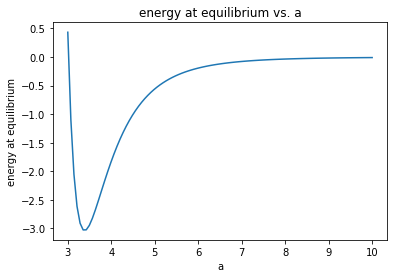

In [27]:
a = np.linspace(3, 10, 100)
u = []

for j in a:
    u.append(bcc_ucell(j, 8, e_Cu, e_Ar, e_CuAr, sigma_Cu, sigma_Ar, sigma_CuAr))

print('the equilibrium energy for bcc is ',min(u))
print('the equilibrium distance for bcc is ',a[u.index(min(u))])

plt.plot(a, u)
plt.xlabel('a')
plt.ylabel('energy at equilibrium')
plt.title('energy at equilibrium vs. a')
plt.show()

we can see that for bcc, the equilibrium energy is -3.0271595469609034 and the equilibrium distance is  3.3535353535353534

Q3-(b) For calculations at non-zero temperatures, because the atoms can move, and they have velocity, thus some modification should be applied: 
1) solve equations of motion for {~ri(t+t)} and momenta{~pi(t+t)} from values and forces at time t; 
2) Calculate kinetic energy, potential energy U, E = K + U, and other quantities of interest as well as forces ~Fi
3) check for drift of values

Q4. In class, we developed a random walk code to model the behavior of a particle through different crystal lattices. Let us now build on this by considering an applied external field along the x- direction, which causes atoms to be two times more likely to move in the +x than the –x direction.
(a) How far from the original starting point on average is an atom after 1,000 jumps in a BCC lattice?
(b) Provide the graphs of mean square displacement and standard deviation versus number of jumps. Are there any significant differences between what we saw in the case with unbiased motion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
delx=[.5, .5 ,.5, .5,.5,.5,.5,.5,-.5,-.5, -.5, -.5]
dely=[.5, .5, -.5, -.5, .5, .5, -.5, -.5,.5, -.5, -.5, .5]
delz=[.5, -.5, .5, -.5, .5, -.5, .5, -.5,-.5, .5, -.5, .5]

In [3]:
def rwn(nt):
    x=np.zeros(nt)
    y=np.zeros(nt)
    z=np.zeros(nt)
    rs2=np.zeros(nt)
    for i in range(nt-1):
      randind=random.randint(0,11)
      x[i+1]=x[i]+delx[randind]
      y[i+1]=y[i]+dely[randind]
      z[i+1]=z[i]+delz[randind]
      rs2[i+1]=pow(x[i+1],2)+pow(y[i+1],2)+pow(z[i+1],2)
    return (x,y,z,rs2)

In [4]:
def arw(nt,nd):
    rwa=np.zeros(nt)
    sig=np.zeros(nt)
    ree=np.zeros(nd)
    for j in range(nd-1):
        x,y,z,rs2=rwn(nt)
        for k in range(nt):
            rwa[k]=(rwa[k]+rs2[k])
            sig[k]=sig[k]+pow(rs2[k],2)
        ree[j]=pow(pow(x[nt-1],2)+pow(y[nt-1],2)+pow(z[nt-1],2),0.5)
    for j in range(nt):
        rwa[j]=rwa[j]/nd
        sig[j]=(sig[j]/nd-pow(rwa[j],2))/pow(rwa[j],2)
    return (rwa,sig,ree)

/Users/Jessie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


167.6414105527729


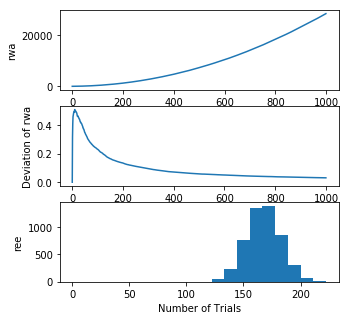

In [7]:
rwa,sig,ree = arw(1000, 5000)
print(np.mean(ree))

plt.figure(figsize=[5, 5])
plt.subplot(311)
plt.plot(rwa)
plt.xlabel('Number of Jumps')
plt.ylabel('rwa')
plt.subplot(312)
plt.plot(sig)
plt.xlabel('Number of Jumps')
plt.ylabel('Deviation of rwa')
plt.subplot(313)
plt.hist(ree, bins=20)
plt.xlabel('Number of Trials')
plt.ylabel('ree')
plt.show()

The distance for an atom after 1,000 jumps in a BCC lattice is 167.6414105527729.
Compared with unbiased motion, the rwa here is not linear, and the deviation of rwa is close to zero